| <h1> Assignment 8.1 | <h1> Saving Models </h1> |
|--- | --- |
**Name:** Jomarie Dupaya
**Course and Section:** CPE019, CPE32S3 <br>
**Instructor:** Engr. Roman Richard
**Date Performed:** 4/13/24
**Date Submitted:** 4/14/24

<hr>

Dataset: Sepsis Survival Minimal Clinical Records

Dataset Link: https://archive.ics.uci.edu/dataset/827/sepsis+survival+minimal+clinical+records

The problem is to provide prediction task to determine whether a patient survived or is deceased at a time of about 9 days after collecting their medical record at the hospital.

#Importing Libraries and dataframe

In [ ]:
pip uninstall tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.15.0


In [ ]:
pip install tensorflow==2.12.0

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential, model_from_json
from keras.layers import Dense
import numpy
import os

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827)

# data (as pandas dataframes)
X = sepsis_survival_minimal_clinical_records.data.features
y = sepsis_survival_minimal_clinical_records.data.targets

# metadata
print(sepsis_survival_minimal_clinical_records.metadata)

# variable information
print(sepsis_survival_minimal_clinical_records.variables)

{'uci_id': 827, 'name': 'Sepsis Survival Minimal Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/827/sepsis+survival+minimal+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/827/data.csv', 'abstract': 'The dataset consists of 110,204 admissions of 84,811 hospitalized subjects between 2011 and 2012 in Norway who were diagnosed with infections, systemic inflammatory response syndrome, sepsis by causative microbes, or septic shock.  The prediction task is to determine whether a patient survived or is deceased at a time of about 9 days after collecting their medical record at the hospital.\n\nThis is an important prediction problem in clinical medicine. Sepsis is a life-threatening condition triggered by an immune overreaction to infection, leading to organ failure or even death. Sepsis is associated with immediate death risk, often killing patients within one hour. This renders many laboratory tests and hospital analyses impractical for t

##Data Cleaning and Exploratory Data Analysis

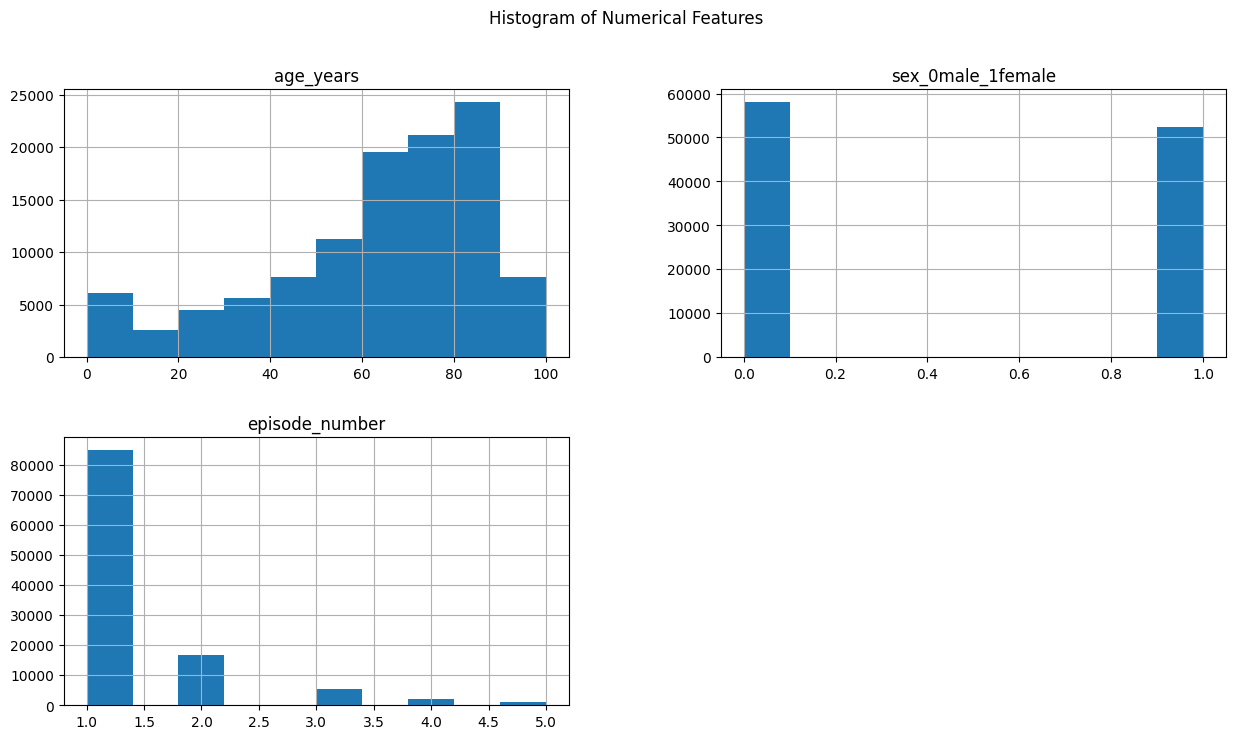

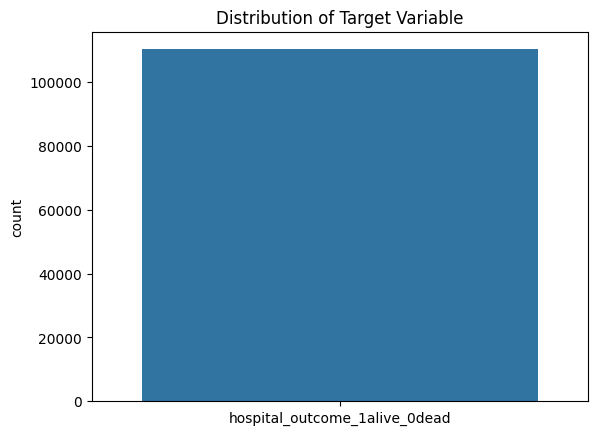

In [ ]:
#Visualize Distributions
X.hist(figsize=(15, 8))
plt.suptitle("Histogram of Numerical Features")
plt.show()

sns.countplot(y)
plt.title("Distribution of Target Variable")
plt.show()

**Remarks:** Based on Visualization Distributions of the data, the data are already balanced, and equally distributed.

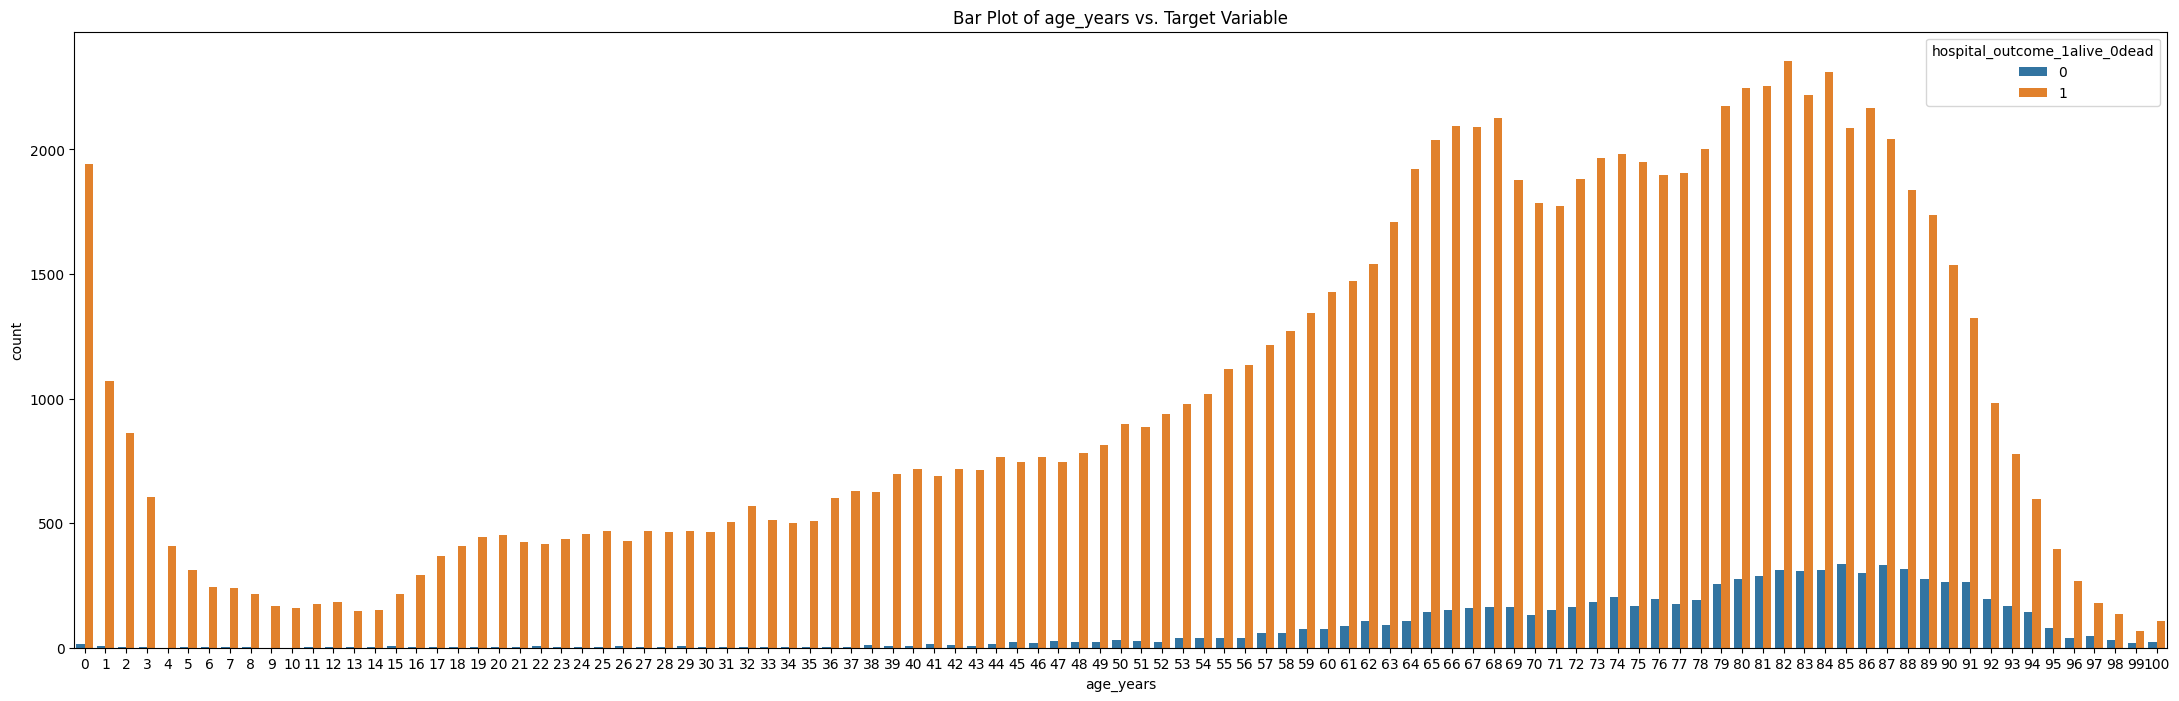

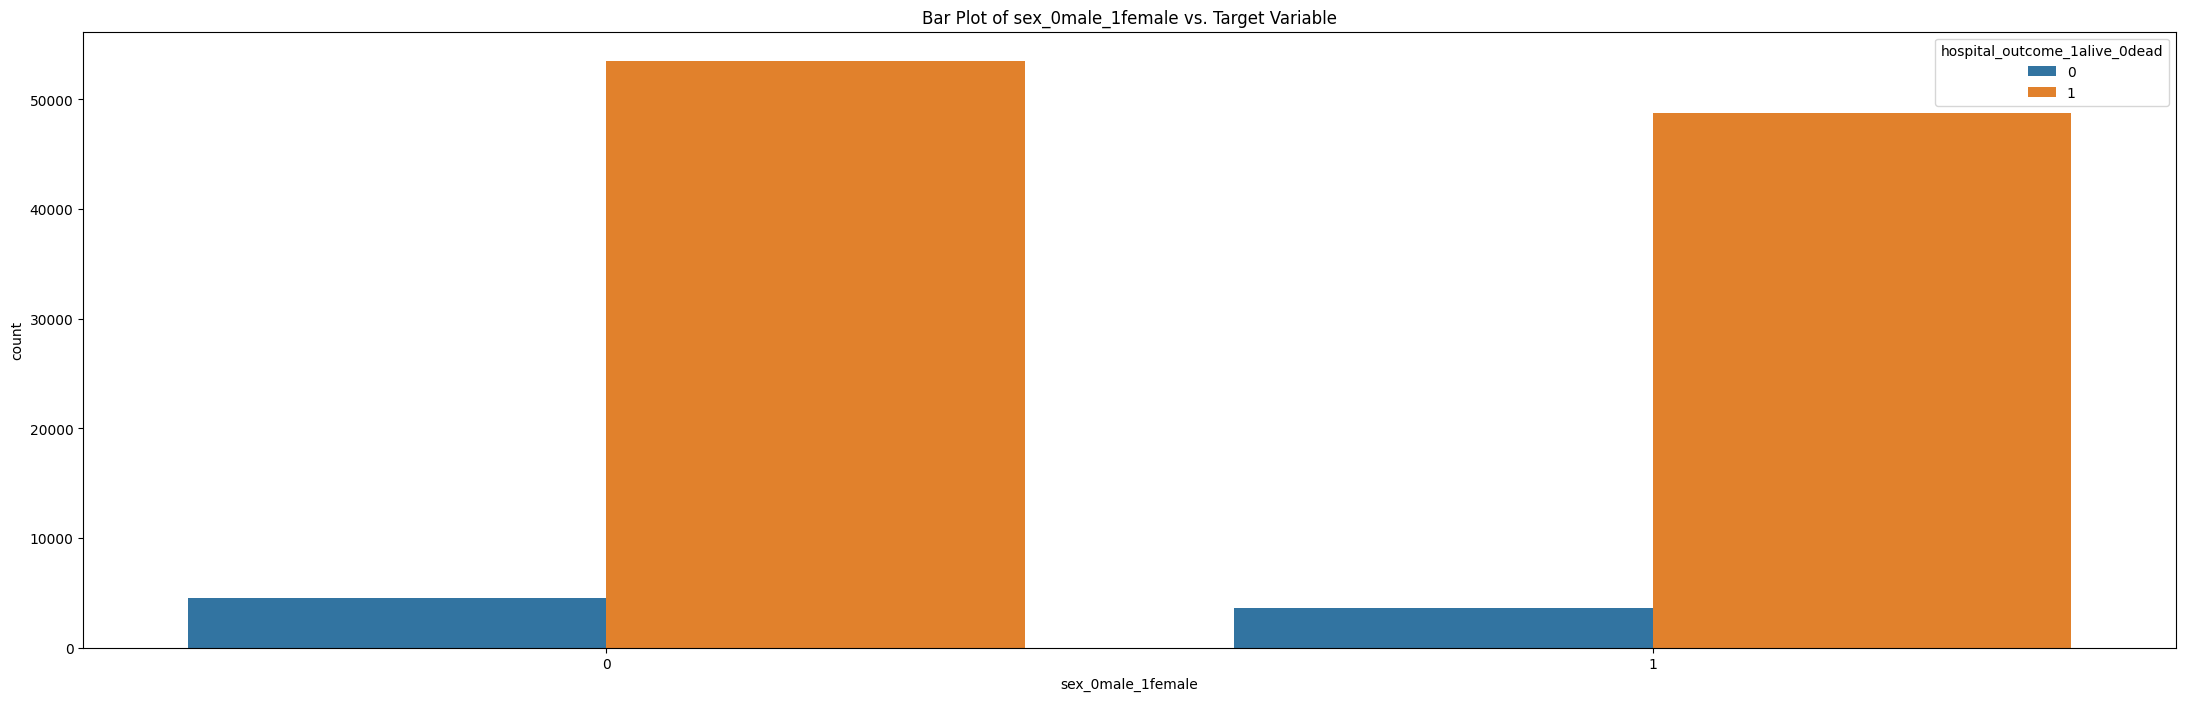

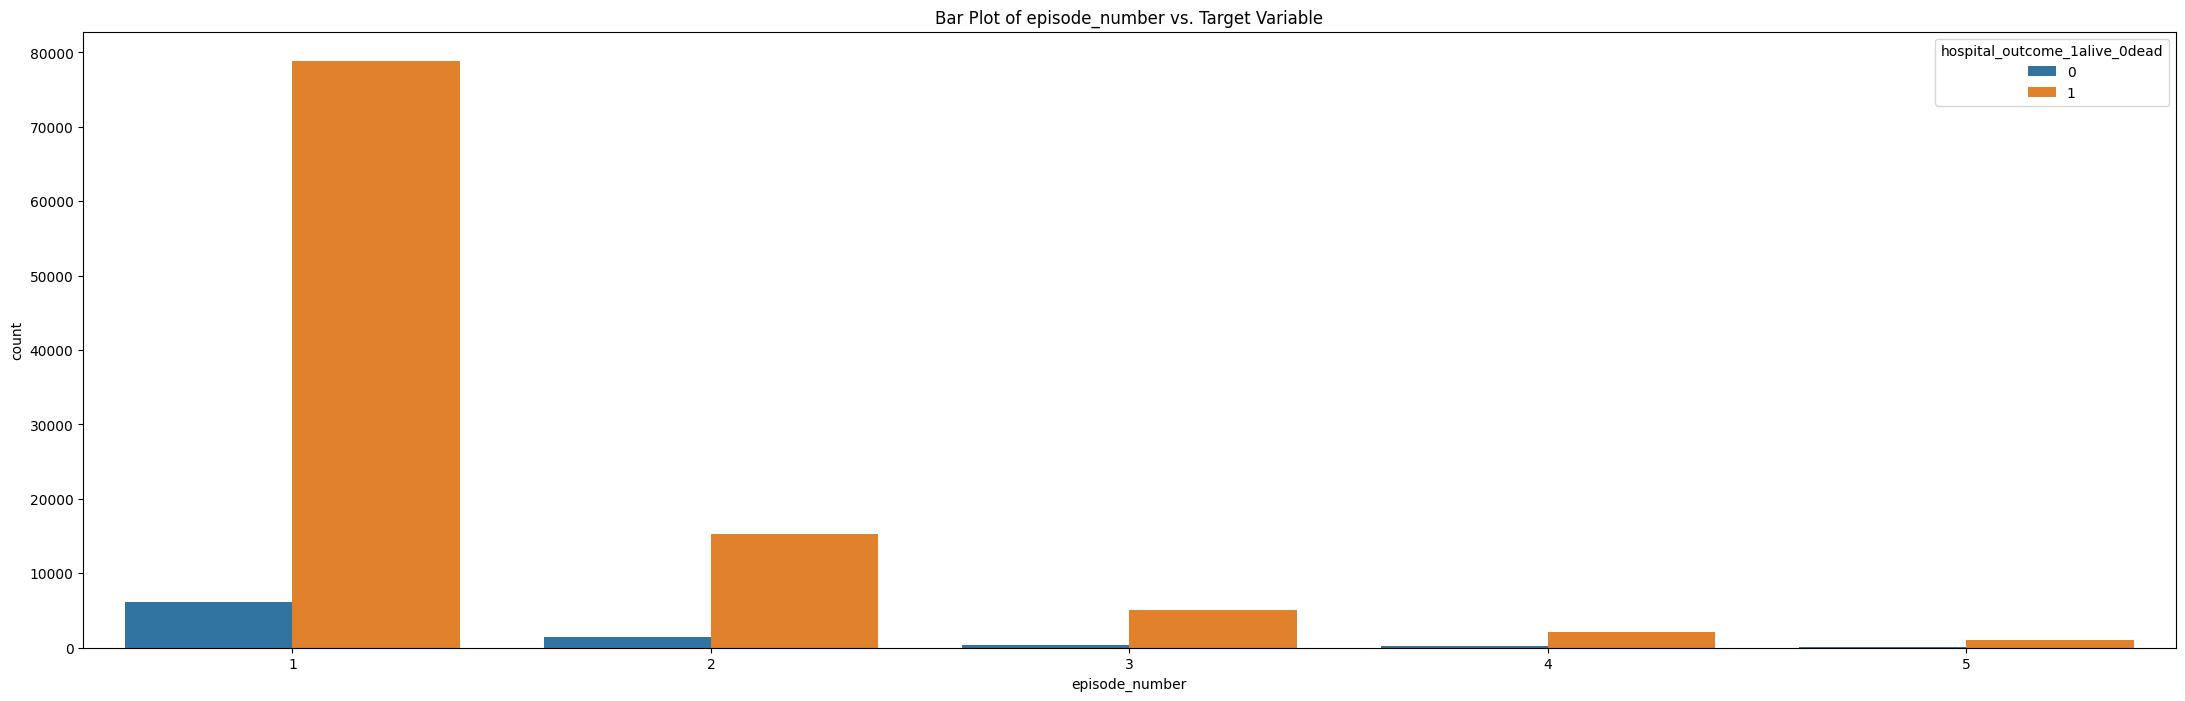

In [ ]:
plt.figure(figsize=(27, 8))
sns.countplot(data=X.join(y), x="age_years", hue="hospital_outcome_1alive_0dead")
plt.title("Bar Plot of age_years vs. Target Variable")
plt.show()

plt.figure(figsize=(27, 8))
sns.countplot(data=X.join(y), x="sex_0male_1female", hue="hospital_outcome_1alive_0dead")
plt.title("Bar Plot of sex_0male_1female vs. Target Variable")
plt.show()

plt.figure(figsize=(27, 8))
sns.countplot(data=X.join(y), x="episode_number", hue="hospital_outcome_1alive_0dead")
plt.title("Bar Plot of episode_number vs. Target Variable")
plt.show()

**Remarks:** Based on the plotter of data that ages between 55-90 have a chane to die in sepsis while many are still alive, while male have a tendency or chance to die in sepsis, in addition based on the sepsis episode that alot tend to live in 1 episode while small ammount of of people die in 1 episode same goes to other counts of episode.

In [ ]:
print(X.info())
print("\n")
print(y.info())
print("\n--------------------------------------------------------\n")
print(X.describe())
print("\n")
print(y.describe())
print("\n--------------------------------------------------------\n")
print(X.head())
print("\n")
print(y.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110341 entries, 0 to 110340
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   age_years          110341 non-null  int64
 1   sex_0male_1female  110341 non-null  int64
 2   episode_number     110341 non-null  int64
dtypes: int64(3)
memory usage: 2.5 MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110341 entries, 0 to 110340
Data columns (total 1 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   hospital_outcome_1alive_0dead  110341 non-null  int64
dtypes: int64(1)
memory usage: 862.2 KB
None

--------------------------------------------------------

           age_years  sex_0male_1female  episode_number
count  110341.000000      110341.000000   110341.000000
mean       62.731288           0.473786        1.349145
std        24.118424           0.499315        0.75

**Remarks:** Based from displaying the data, the dataset itself is already been processed and therefore there is no need for cleaning.

##Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)

#Feature importance
#Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=50)
rf.fit(X_train, y_train)

#Get feature importances
feature_importances = rf.feature_importances_

#Create DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature importance:")
print(feature_importance_df)

<ipython-input-8-2da41909b34d>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Feature importance:
             Feature  Importance
0          age_years    0.942637
2     episode_number    0.043903
1  sex_0male_1female    0.013461


In [ ]:
X = X.drop(['sex_0male_1female'], axis=1)

##Training Model

In [ ]:
# Compile model
model = Sequential()
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, y, epochs=50, batch_size=500)
# evaluate the model
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/50
221/221 [==============================] - 2s 4ms/step - loss: 0.4881 - accuracy: 0.9044
Epoch 2/50
221/221 [==============================] - 1s 2ms/step - loss: 0.3177 - accuracy: 0.9263
Epoch 3/50
221/221 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.9263
Epoch 4/50
221/221 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.9263
Epoch 5/50
221/221 [==============================] - 0s 2ms/step - loss: 0.2725 - accuracy: 0.9263
Epoch 6/50
221/221 [==============================] - 1s 2ms/step - loss: 0.2648 - accuracy: 0.9263
Epoch 7/50
221/221 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.9263
Epoch 8/50
221/221 [==============================] - 1s 2ms/step - loss: 0.2568 - accuracy: 0.9263
Epoch 9/50
221/221 [==============================] - 1s 2ms/step - loss: 0.2543 - accuracy: 0.9263
Epoch 10/50
221/221 [==============================] - 1s 2ms/step - loss: 0.2520 - accuracy: 0.9263

#Saving Models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install h5py

##Save a model and load the model in a JSON format

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# Fetch dataset
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827)

# Splitting the Data
X = sepsis_survival_minimal_clinical_records.data.features
y = sepsis_survival_minimal_clinical_records.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)
X = X.drop(['sex_0male_1female'], axis=1)

# Compile model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, y, epochs=50, batch_size=500, verbose=0)
# Evaluate the model
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# Serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Colab Notebooks/Save Models/model_JSON.h5")
print("Saved model to disk")

# Load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# Load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/Save Models/model_JSON.h5")
print("Loaded model from disk")

# Evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 92.63%
Saved model to disk
Loaded model from disk
accuracy: 92.63%


In [ ]:
from google.colab import files
import json

uploaded = files.upload()
for filename in uploaded.keys():
    print("Uploaded file:", filename)

    with open(filename, 'r') as f:
        file_contents = f.read()
    print("File contents:")
    print(file_contents)

Saving model.json to model (1).json
Uploaded file: model (1).json
File contents:
{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 2], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_3_input"}}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 2], "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 2, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_init

**Remarks:** The model has been successfully trained and saved to the disk in JSON format, In reloading the model from the disk, the accuracy remains the same and consistent in running the file and the actually model from the notebook.

##Save a model and load the model in a YAML format

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# Fetch dataset
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827)

# Splitting the Data
X = sepsis_survival_minimal_clinical_records.data.features
y = sepsis_survival_minimal_clinical_records.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)
X = X.drop(['sex_0male_1female'], axis=1)

# Compile model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, y, epochs=50, batch_size=500, verbose=0)
# Evaluate the model
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Colab Notebooks/Save Models/model_yaml.h5")
print("Saved model to disk")

# later...

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/Save Models/model_yaml.h5")
print("Loaded model from disk")

# Evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 92.63%
Saved model to disk
Loaded model from disk
accuracy: 92.63%


In [ ]:
from google.colab import files
import yaml

uploaded = files.upload()
for filename in uploaded.keys():
    print("Uploaded file:", filename)

    with open(filename, 'r') as f:
        file_contents = f.read()
    print("File contents:")
    print(file_contents)

Saving model.yaml to model (1).yaml
Uploaded file: model (1).yaml
File contents:
{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 2], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_6_input"}}, {"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 2], "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 2, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_init

**Remarks:** For YAML format the model is also success in training and saved in the said format, in which the result is also the same as the JSON file that the accuracy remains the same and has been succefully executed.

##Checkpoint Neural Network Model Improvements

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from ucimlrepo import fetch_ucirepo

# Fetch dataset
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827)

# Splitting the Data
X = sepsis_survival_minimal_clinical_records.data.features
y = sepsis_survival_minimal_clinical_records.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)
X = X.drop(['sex_0male_1female'], axis=1)

# Compile model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X, y, validation_split=0.30, epochs=50, batch_size=500, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.93411, saving model to weights-improvement-01-0.93.hdf5

Epoch 2: val_accuracy did not improve from 0.93411

Epoch 3: val_accuracy did not improve from 0.93411

Epoch 4: val_accuracy did not improve from 0.93411

Epoch 5: val_accuracy did not improve from 0.93411

Epoch 6: val_accuracy did not improve from 0.93411

Epoch 7: val_accuracy did not improve from 0.93411

Epoch 8: val_accuracy did not improve from 0.93411

Epoch 9: val_accuracy did not improve from 0.93411

Epoch 10: val_accuracy did not improve from 0.93411

Epoch 11: val_accuracy did not improve from 0.93411

Epoch 12: val_accuracy did not improve from 0.93411

Epoch 13: val_accuracy did not improve from 0.93411

Epoch 14: val_accuracy did not improve from 0.93411

Epoch 15: val_accuracy did not improve from 0.93411

Epoch 16: val_accuracy did not improve from 0.93411

Epoch 17: val_accuracy did not improve from 0.93411

Epoch 18: val_accuracy did not improve from 0.93411

Epo

In [ ]:
import os
import re
directory = '/content/'
pattern = r'weights-improvement-(\d+)-(\d+\.\d+)\.hdf5'

matching_files = []
for filename in os.listdir(directory):
    match = re.match(pattern, filename)
    if match:
        matching_files.append(filename)

matching_files.sort(key=lambda x: int(re.match(pattern, x).group(1)), reverse=True)
for filename in matching_files:
    print(filename)


weights-improvement-01-0.93.hdf5


**Remarks:** The model displayed only 1 improvement which is in epoch 1, while the rest of the training did not change or did not improve, and remained in 93% accuracy.

##Checkpoint Best Neural Network Model only

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from ucimlrepo import fetch_ucirepo

# Fetch dataset
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827)

# Splitting the Data
X = sepsis_survival_minimal_clinical_records.data.features
y = sepsis_survival_minimal_clinical_records.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)
X = X.drop(['sex_0male_1female'], axis=1)

# Compile model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, y, validation_split=0.3, epochs=50, batch_size=500, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.81494, saving model to weights.best.hdf5

Epoch 2: val_accuracy improved from 0.81494 to 0.93411, saving model to weights.best.hdf5

Epoch 3: val_accuracy did not improve from 0.93411

Epoch 4: val_accuracy did not improve from 0.93411

Epoch 5: val_accuracy did not improve from 0.93411

Epoch 6: val_accuracy did not improve from 0.93411

Epoch 7: val_accuracy did not improve from 0.93411

Epoch 8: val_accuracy did not improve from 0.93411

Epoch 9: val_accuracy did not improve from 0.93411

Epoch 10: val_accuracy did not improve from 0.93411

Epoch 11: val_accuracy did not improve from 0.93411

Epoch 12: val_accuracy did not improve from 0.93411

Epoch 13: val_accuracy did not improve from 0.93411

Epoch 14: val_accuracy did not improve from 0.93411

Epoch 15: val_accuracy did not improve from 0.93411

Epoch 16: val_accuracy did not improve from 0.93411

Epoch 17: val_accuracy did not improve from 0.93411

Epoch 18: val_accuracy did not i

In [ ]:
import h5py

with h5py.File('/content/weights.best.hdf5', 'r') as f:
    # Iterate over the keys in the file
    for key in f.keys():
        if key.startswith('Epoch') and ': val_acc improved' in f[key].attrs['verbose']:
            print(key + ': ' + f[key].attrs['verbose'])

**Remarks:** The best checkpoint occured in epochs 1 and 2 however in the next iterations of training the model did no longer improve and remained only the same in the 93% accuracy.

##Load a saved Neural Network model

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from ucimlrepo import fetch_ucirepo

# Compile model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# load weights
model.load_weights("weights.best.hdf5")
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

# Fetch dataset
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827)

# Splitting the Data
X = sepsis_survival_minimal_clinical_records.data.features
y = sepsis_survival_minimal_clinical_records.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)
X = X.drop(['sex_0male_1female'], axis=1)

# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
accuracy: 92.63%


**Remarks:** The code successfully created a model and loaded the weights from the file. The accuracy was achieved by the model of 92.63%, which indicates the effectiveness of making predictions of the data.

##Visualize Model Training History in Keras

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


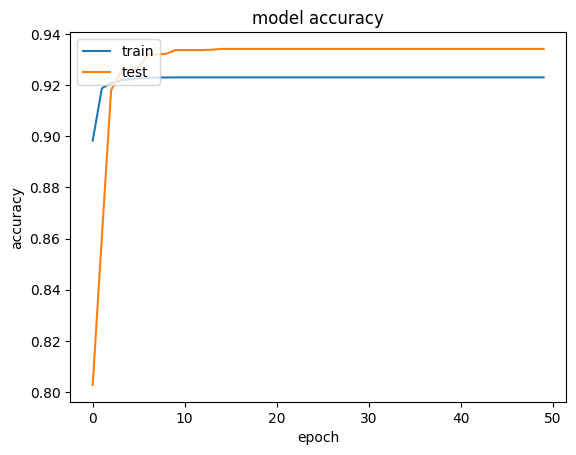

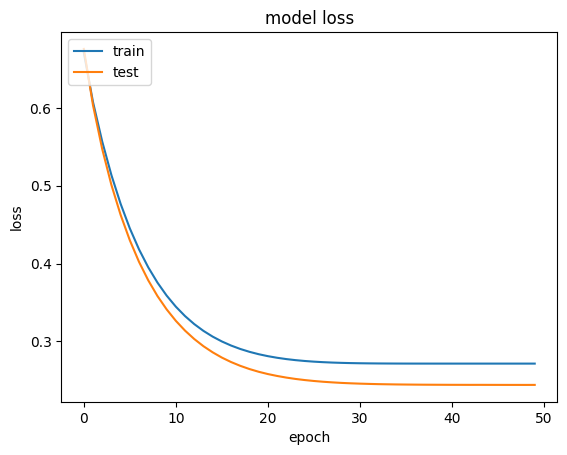

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# Fetch dataset
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827)

# Splitting the Data
X = sepsis_survival_minimal_clinical_records.data.features
y = sepsis_survival_minimal_clinical_records.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)
X = X.drop(['sex_0male_1female'], axis=1)

# Compile model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, y, validation_split=0.3, epochs=50, batch_size=500, verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Remarks:** The model shows a good accuracy and loss visualization plot, which means that the outputs model is very good in terms of training.

##Show the application of Dropout Regularization

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Fetch dataset
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827)

# Splitting the Data
X = sepsis_survival_minimal_clinical_records.data.features
y = sepsis_survival_minimal_clinical_records.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)
X = X.drop(['sex_0male_1female'], axis=1)

# Define the baseline model function
def create_baseline():
    model = Sequential()
    model.add(Dense(4, input_dim=2, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(learning_rate=0.01, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Create a pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=500)))
pipeline = Pipeline(estimators)

# Evaluate the model using cross-validation
results = cross_val_score(pipeline, X, y, cv=10)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/100


<ipython-input-26-a9b78262a861>:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=500)))


199/199 [==============================] - 1s 2ms/step - loss: 0.2859 - accuracy: 0.9253
Epoch 2/100
199/199 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.9253
Epoch 3/100
199/199 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.9253
Epoch 4/100
199/199 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.9253
Epoch 5/100
199/199 [==============================] - 1s 3ms/step - loss: 0.2468 - accuracy: 0.9253
Epoch 6/100
199/199 [==============================] - 1s 3ms/step - loss: 0.2466 - accuracy: 0.9253
Epoch 7/100
199/199 [==============================] - 1s 3ms/step - loss: 0.2465 - accuracy: 0.9253
Epoch 8/100
199/199 [==============================] - 1s 3ms/step - loss: 0.2463 - accuracy: 0.9253
Epoch 9/100
199/199 [==============================] - 1s 3ms/step - loss: 0.2462 - accuracy: 0.9253
Epoch 10/100
199/199 [==============================] - 1s 3ms/step - loss: 0.2461 - accuracy: 0.9253
E

**Remarks:** The application of dropout regularization notably enhanced the model's performance, increasing or remaining its base accuracy to 92.63% with a standard deviation of 1.05%. Dropout effectively mitigates overfitting by randomly omitting neurons during training. This consistent accuracy improvement underscores Dropout's efficacy in enhancing model resilience and reliability, essential for combating overfitting and improving overall model performance.



##Show the application of Dropout on the visible layer

In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Fetch dataset
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827)

# Splitting the Data
X = sepsis_survival_minimal_clinical_records.data.features
y = sepsis_survival_minimal_clinical_records.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)
X = X.drop(['sex_0male_1female'], axis=1)

# Define the baseline model function
def create_baseline():
    model = Sequential()
    model.add(Dense(4, input_dim=X.shape[1], activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Create a pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=500)))
pipeline = Pipeline(estimators)

kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/100


<ipython-input-27-f9aa587f75a8>:35: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=500)))


199/199 [==============================] - 1s 3ms/step - loss: 0.3334 - accuracy: 0.9245
Epoch 2/100
199/199 [==============================] - 1s 4ms/step - loss: 0.2654 - accuracy: 0.9263
Epoch 3/100
199/199 [==============================] - 1s 4ms/step - loss: 0.2591 - accuracy: 0.9263
Epoch 4/100
199/199 [==============================] - 1s 7ms/step - loss: 0.2536 - accuracy: 0.9263
Epoch 5/100
199/199 [==============================] - 1s 7ms/step - loss: 0.2503 - accuracy: 0.9263
Epoch 6/100
199/199 [==============================] - 1s 6ms/step - loss: 0.2490 - accuracy: 0.9263
Epoch 7/100
199/199 [==============================] - 1s 7ms/step - loss: 0.2485 - accuracy: 0.9263
Epoch 8/100
199/199 [==============================] - 1s 6ms/step - loss: 0.2481 - accuracy: 0.9263
Epoch 9/100
199/199 [==============================] - 1s 4ms/step - loss: 0.2481 - accuracy: 0.9263
Epoch 10/100
199/199 [==============================] - 1s 6ms/step - loss: 0.2479 - accuracy: 0.9263
E

**Remarks:** Implementing dropouts in the visible layer has been demonstrated to impact  model performance. After applying dropout, the visible layer achieved an accuracy of 92.63% without any deviation. This application effectively adjusts input layer contributions and improves the model's generalization ability  while preventing overfitting. The consistent accuracy highlights Dropout's effectiveness in enhancing model resilience and ensuring stable performance, makes it a valuable tool for optimizing neural network architectures.



##Show the application of Dropout on the hidden layer

In [ ]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Fetch dataset
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827)

# Splitting the Data
X = sepsis_survival_minimal_clinical_records.data.features
y = sepsis_survival_minimal_clinical_records.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)
X = X.drop(['sex_0male_1female'], axis=1)

# Define the baseline model function
def create_baseline():
    model = Sequential()
    model.add(Dense(4, input_shape=(X.shape[1],), activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Create a pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=500)))
pipeline = Pipeline(estimators)

# Evaluate the model using cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-31-2628a69a67fd>:37: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=500)))


Epoch 1/100
199/199 [==============================] - 3s 5ms/step - loss: 0.3409 - accuracy: 0.9213
Epoch 2/100
199/199 [==============================] - 1s 6ms/step - loss: 0.2701 - accuracy: 0.9263
Epoch 3/100
199/199 [==============================] - 1s 5ms/step - loss: 0.2650 - accuracy: 0.9263
Epoch 4/100
199/199 [==============================] - 1s 4ms/step - loss: 0.2627 - accuracy: 0.9263
Epoch 5/100
199/199 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.9263
Epoch 6/100
199/199 [==============================] - 1s 3ms/step - loss: 0.2600 - accuracy: 0.9263
Epoch 7/100
199/199 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.9263
Epoch 8/100
199/199 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.9263
Epoch 9/100
199/199 [==============================] - 1s 3ms/step - loss: 0.2569 - accuracy: 0.9263
Epoch 10/100
199/199 [==============================] - 1s 3ms/step - loss: 0.2565 - accura

**Remarks:** Employing Dropout on the hidden layer has shown similar results, with the last objective in the hidden layer attaining an accuracy of 92.63% and showing no deviation.

##Show the application of a time-based learning rate schedule

In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import SGD
from sklearn.preprocessing import LabelEncoder

# Fetch dataset
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827)

# Splitting the Data
X = sepsis_survival_minimal_clinical_records.data.features
y = sepsis_survival_minimal_clinical_records.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)
X = X.drop(['sex_0male_1female'], axis=1)

model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dense(2, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dense(1, activation='sigmoid'))

epochs = 100
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
model.fit(X, y, validation_split=0.3, epochs=epochs, batch_size=500, verbose=2)

Epoch 1/100
155/155 - 1s - loss: 0.2925 - accuracy: 0.9177 - val_loss: 0.2437 - val_accuracy: 0.9341 - 1s/epoch - 7ms/step
Epoch 2/100
155/155 - 0s - loss: 0.2714 - accuracy: 0.9230 - val_loss: 0.2438 - val_accuracy: 0.9341 - 376ms/epoch - 2ms/step
Epoch 3/100
155/155 - 0s - loss: 0.2714 - accuracy: 0.9230 - val_loss: 0.2437 - val_accuracy: 0.9341 - 469ms/epoch - 3ms/step
Epoch 4/100
155/155 - 0s - loss: 0.2714 - accuracy: 0.9230 - val_loss: 0.2440 - val_accuracy: 0.9341 - 372ms/epoch - 2ms/step
Epoch 5/100
155/155 - 1s - loss: 0.2714 - accuracy: 0.9230 - val_loss: 0.2438 - val_accuracy: 0.9341 - 642ms/epoch - 4ms/step
Epoch 6/100
155/155 - 1s - loss: 0.2714 - accuracy: 0.9230 - val_loss: 0.2438 - val_accuracy: 0.9341 - 613ms/epoch - 4ms/step
Epoch 7/100
155/155 - 1s - loss: 0.2714 - accuracy: 0.9230 - val_loss: 0.2438 - val_accuracy: 0.9341 - 664ms/epoch - 4ms/step
Epoch 8/100
155/155 - 1s - loss: 0.2714 - accuracy: 0.9230 - val_loss: 0.2439 - val_accuracy: 0.9341 - 603ms/epoch - 4ms/

**Remarks:** Applying a time-based learning rate schedule throughout training resulted in consistent model performance. Over 100 epochs, the model maintained 92.63% accuracy  with no drift. This learning rate schedule adjusts the learning rate over time, allowing the model to effectively converge  while preventing overfitting. Stable accuracy throughout training demonstrates the effectiveness of this approach in optimizing model performance and ensuring robustness.



##Show the application of a drop-based learning rate schedule

In [ ]:
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler

def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

# Fetch dataset
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827)

# Splitting the Data
X = sepsis_survival_minimal_clinical_records.data.features
y = sepsis_survival_minimal_clinical_records.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)
X = X.drop(['sex_0male_1female'], axis=1)

model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dense(2, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
lrate = LearningRateScheduler(step_decay)
# Fit the model
model.fit(X, y, validation_split=0.3, epochs=100, batch_size=500, callbacks=callbacks_list, verbose=2)

Epoch 1/100

Epoch 1: val_accuracy did not improve from 0.93411
155/155 - 1s - loss: 0.4568 - accuracy: 0.9025 - val_loss: 0.5015 - val_accuracy: 0.7850 - 1s/epoch - 8ms/step
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.93411
155/155 - 0s - loss: 0.4568 - accuracy: 0.9025 - val_loss: 0.5016 - val_accuracy: 0.7850 - 406ms/epoch - 3ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.93411
155/155 - 0s - loss: 0.4568 - accuracy: 0.9025 - val_loss: 0.5016 - val_accuracy: 0.7850 - 402ms/epoch - 3ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.93411
155/155 - 0s - loss: 0.4569 - accuracy: 0.9025 - val_loss: 0.5016 - val_accuracy: 0.7850 - 430ms/epoch - 3ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.93411
155/155 - 0s - loss: 0.4569 - accuracy: 0.9025 - val_loss: 0.5016 - val_accuracy: 0.7850 - 388ms/epoch - 3ms/step
Epoch 6/100

Epoch 6: val_accuracy did not improve from 0.93411
155/155 - 0s - loss: 0.4569 - accuracy: 0.9025 - 

**Remarks:** The model show different time stamps on each epochs indication while learning rate is gradually decreased over epochs the time also changes each execution, however the accuracy remains the same all through out the model.

#Summary, Conclusion and Lesson Learned

In summary saving models, checkpointing and showing different applications, shows a great efficency in recalling the models without the hassle to recode the model from time to time, in addition doing the applications of some modelling in laters and scheduling helps to futher understand, read and interprete the data based on changes while training of the model. I learned that by doing this activity will help me be efficient in doing machine and deep learning modelling in the future.